In [1]:
import fastai as fai
import torch
import torch.nn as nn #ésta es la biblioteca que me va a ayudar para hacer redes convolucionales desde 0
from math import prod,sqrt

In [2]:
bs = 4 #la cantidad de datos que tengo
n= 5

x = torch.rand(bs,n) #esto realmente hay que obtenerlo de mis datos

In [3]:
red_neuronal = nn.Sequential( #modulo que corre en orden de como le pase mis cosas
    nn.Linear(5,10), #la transformacion afin de R5 -->R10, la va a inicial con parametros aleatorios
    nn.ReLU(), #no tiene parametros, el de 0 en negativos e identidad en positivos
    nn.Linear(10,8), #si arriba terminé en 10, acá empiezo en 10
    nn.LeakyReLU(negative_slope=0.1), #Activación también
    nn.Linear(8,3) #Ojo: la mayúscula
) #lo del gradiente, lo hace por ti

In [4]:
red_neuronal(x) #Es básicamente una función, no?

tensor([[-0.3770, -0.5443,  0.4194],
        [-0.3136, -0.6394,  0.4006],
        [-0.3505, -0.5547,  0.3650],
        [-0.3808, -0.5559,  0.4025]], grad_fn=<AddmmBackward>)

In [5]:
red_neuronal(x).shape  #mi bs = 4, y terminamos en 3 en nn.Linear

torch.Size([4, 3])

In [6]:
red_neuronal #aquí vemos lo que es

Sequential(
  (0): Linear(in_features=5, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=8, bias=True)
  (3): LeakyReLU(negative_slope=0.1)
  (4): Linear(in_features=8, out_features=3, bias=True)
)

In [7]:
a = red_neuronal[0]

In [8]:
a #--> puede hacer muchas cosas

Linear(in_features=5, out_features=10, bias=True)

In [9]:
list(a.parameters())#[0].shape ---> la matriz que multiplica

#Estos parámetros son los que la red neuronal va a aprender, no son la X realmente de mis datos

[Parameter containing:
 tensor([[ 0.0619, -0.2575, -0.0193,  0.1420,  0.1170],
         [-0.0534, -0.1907, -0.0554,  0.2394,  0.4070],
         [-0.1713,  0.4090, -0.3770,  0.1895, -0.0500],
         [ 0.3492,  0.4156,  0.3119, -0.0692, -0.2002],
         [-0.4035,  0.4135,  0.2850, -0.3936,  0.1792],
         [ 0.1879, -0.2287, -0.4462,  0.0956, -0.0955],
         [-0.0768, -0.3489,  0.0968, -0.0354,  0.2361],
         [ 0.1133, -0.2388,  0.3564,  0.0265, -0.0573],
         [-0.2057,  0.4130, -0.3842,  0.0013,  0.2527],
         [-0.0882,  0.2600, -0.1081,  0.2254,  0.3325]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0375,  0.0604,  0.2001,  0.2975, -0.1845,  0.2628,  0.4341, -0.3754,
          0.0175,  0.4448], requires_grad=True)]

In [10]:
x = torch.randn(8,8)

In [11]:
activacion = nn.ReLU()

In [12]:
activacion(x) #---> nn.ReLU()(x)

tensor([[0.0000, 0.3618, 1.0804, 0.7151, 0.0302, 1.2746, 0.4946, 0.0000],
        [0.0977, 0.7602, 0.3758, 0.2634, 0.0000, 0.0000, 0.0901, 0.0000],
        [0.0586, 0.3055, 0.0000, 0.7045, 0.5401, 0.0709, 0.0000, 2.2053],
        [0.2658, 0.5627, 0.0000, 0.8004, 1.8809, 0.0419, 0.0000, 0.3632],
        [0.8476, 0.0000, 2.8918, 1.0049, 0.0000, 0.8782, 1.1536, 0.0000],
        [0.0000, 0.1193, 0.0000, 0.0000, 0.0000, 0.2077, 0.0000, 0.0000],
        [0.0044, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8747, 1.0401],
        [0.0231, 0.0000, 0.0000, 0.0000, 0.8624, 1.6859, 2.0868, 0.0000]])

In [13]:
x #---> todos los negativos los hizo 0 el ReLU!

tensor([[-2.2439,  0.3618,  1.0804,  0.7151,  0.0302,  1.2746,  0.4946, -0.4572],
        [ 0.0977,  0.7602,  0.3758,  0.2634, -1.9141, -1.3462,  0.0901, -2.1926],
        [ 0.0586,  0.3055, -0.6753,  0.7045,  0.5401,  0.0709, -0.2273,  2.2053],
        [ 0.2658,  0.5627, -0.0270,  0.8004,  1.8809,  0.0419, -2.5701,  0.3632],
        [ 0.8476, -1.1119,  2.8918,  1.0049, -1.6778,  0.8782,  1.1536, -1.5947],
        [-0.3924,  0.1193, -0.4357, -1.0457, -0.0116,  0.2077, -0.3649, -0.0055],
        [ 0.0044, -0.9720, -0.3110, -0.3103, -0.2406, -0.0925,  0.8747,  1.0401],
        [ 0.0231, -0.3967, -0.6948, -1.7352,  0.8624,  1.6859,  2.0868, -0.1001]])

In [14]:
import fastai.vision.all as fv
from torchvision.transforms import ToTensor, ToPILImage
to_tensor = ToTensor()
to_pil = ToPILImage()

In [15]:
img = fv.PILImage.create("exa.png")
img_tensor = to_tensor(img)

In [16]:
img_tensor.shape

torch.Size([3, 600, 600])

In [17]:
conv = nn.Conv2d(3,1,kernel_size=3) #de cuánto por cuánto es el filtro, aquí es de 3x3

In [18]:
conv(img_tensor[None]).shape #torch está siempre esperando batches, entonces ese None es para agregar un batch de 1

torch.Size([1, 1, 598, 598])

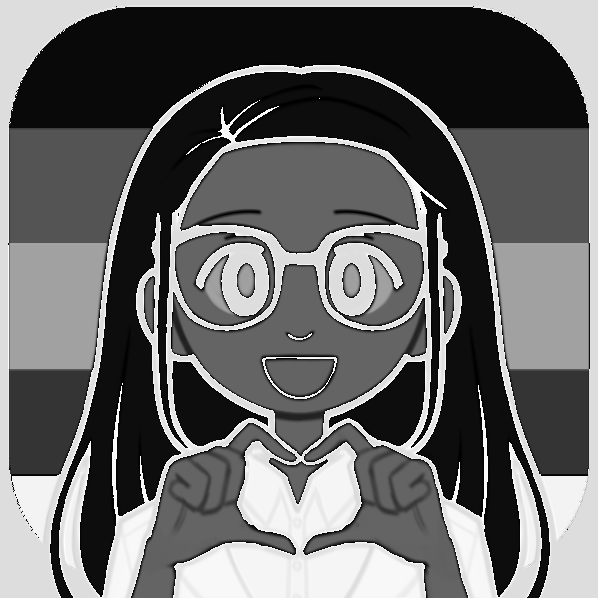

In [19]:
f = to_pil(conv(img_tensor[None])[0]); f #este es un filtro aleatorio de hecho

In [20]:
#Flatten servirá para conectar las capas convolucionales con las lineales (densas)
class Flatten(nn.Module):
    def __init__(self):#init es cuando creas un objeto siempre
        super().__init__() #esto tambien es de cajon en todos los modulos de python
    
    def forward(self,x): #esta funcion lo unico que hace es pasar de convolucional a la parte lineal o densa
        #return x.squeeze() #esto tiene un pequeño error cuando la Batch Size sea de 1: la va a quitar
        return x.view(x.shape[0],-1) #o x.reshape

def num_params(model):
    total = 0
    for p in model.parameters():
        num = 1
        for s in list(p.size()):
            num *= s
        total += num
    return total
    #return sum([prod(p.shape) for p in model.parameters]) #tomar el producto de p.shape para cada p en los parámetros

In [21]:
model = nn.Sequential(
    nn.Conv2d(3,32, kernel_size=3, stride=2, padding=1), #32 filtos de 3x3, salta de 2 en 2 pixeles, padding es para agregar el marco negro
    nn.ReLU(),
    nn.MaxPool2d(2), #Aqui tomaba el pixel mas grande de cada cuadro de 2x2
    nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128, kernel_size=3, stride=1, padding=21),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,102))

In [22]:
model

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(21, 21))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): AdaptiveAvgPool2d(output_size=1)
  (15): Flatten()
  (16): Linear(in_features=512, out_features=256, bias=True)
  (17): ReLU()
  (18): Linear(in_features=256, out_features=102, bias=True)
)

In [23]:
num_params(model)

1726118

In [24]:
img = torch.rand(10,3,256,256)

In [25]:
model(img).shape

torch.Size([10, 102])

In [29]:
def load_data(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=True, max_rotate=360, max_lighting=0.3,max_zoom=1.2,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = lambda x: x.parent.name,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [27]:
!ls flowers/

train  valid


In [28]:
data = load_data("flowers", img_size=224, batch_size=128)

In [30]:
learn = fv.Learner(data,model, metrics=fv.accuracy)

In [31]:
learn.summary()

Sequential (Input shape: ['128 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               128 x 32 x 112 x 11  896        True      
________________________________________________________________
ReLU                 128 x 32 x 112 x 11  0          False     
________________________________________________________________
MaxPool2d            128 x 32 x 56 x 56   0          False     
________________________________________________________________
Conv2d               128 x 64 x 56 x 56   18,496     True      
________________________________________________________________
ReLU                 128 x 64 x 56 x 56   0          False     
________________________________________________________________
MaxPool2d            128 x 64 x 28 x 28   0          False     
________________________________________________________________
Conv2d               128 x 128 x 68 x 68  73,856     True      
________________________________________________

In [32]:
learn.fit_one_cycle(8,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.591913,4.512928,0.033531,00:33
1,4.525660,4.426490,0.023669,00:29
2,4.324905,4.046619,0.045365,00:28
3,4.094046,3.914843,0.071006,00:28
4,3.923824,3.740126,0.084813,00:28
5,3.765228,3.610031,0.098619,00:28
6,3.640478,3.532201,0.118343,00:28
7,3.576878,3.516321,0.122288,00:28


In [33]:
B = nn.BatchNorm1d(20)

In [34]:
x = torch.rand(64,20)
B(x)

tensor([[-1.7515, -1.5057,  1.1148,  ..., -0.9487,  0.2692,  1.2566],
        [-1.6995, -1.0321,  0.7428,  ...,  1.2302, -0.2971, -1.2382],
        [-0.7498, -0.6053, -0.8800,  ...,  0.9956,  0.2985, -1.3107],
        ...,
        [-1.0888,  1.1238,  0.1995,  ..., -0.0260, -0.7977,  0.8815],
        [-0.8720,  0.6446, -1.0413,  ...,  0.2442,  0.9630,  0.7169],
        [ 1.1339,  1.0676, -1.4710,  ...,  0.0199, -1.4392,  1.5948]],
       grad_fn=<NativeBatchNormBackward>)

In [35]:
B.weight

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.], requires_grad=True)

In [36]:
nn.Sequential(nn.BatchNorm2d(3), #esto es a consideración de Raggi... súper sí hazlo.
              nn.Conv2d(3,16,kernel_size=3),
              nn.ReLU(),
              nn.BatchNorm2d(16),
              nn.Conv2d(16,32,kernel_size=3),
              nn.ReLU(),
              nn.BatchNorm2d(32),
             )

Sequential(
  (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (2): ReLU()
  (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (5): ReLU()
  (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [37]:
class ResBlock(nn.Module):
    def __init__(self, residual):
        super().__init__()
        self.residual = residual
    
    def forward(self, x):
        return x + self.residual(x)

In [38]:
def crear_residual(filters):
    bottleneck = (filters+1)//2 #ese uno es para que si es impar se tome la parte entera por arriba...
    residual = nn.Sequential(
        nn.Conv2d(filters, bottleneck, kernel_size=1), #esto es como para reducir el tamaño, es como una compresión
        nn.ReLU(),
        nn.BatchNorm2d(bottleneck),
        nn.Conv2d(bottleneck, bottleneck, kernel_size=3, padding=1), #ya es una convolución bien en la cosa comprimida
        nn.ReLU(),
        nn.BatchNorm2d(bottleneck),
        nn.Conv2d(bottleneck, filters, kernel_size=3), #descomprimir otra vez
        nn.ReLU(),
        nn.BatchNorm2d(filters) #tenemos que terminar con BatchNorm, debería empezar con unos...
    ) #como que lo que queremos es que este resblock sea la identidad, y a partir de ahí aprenda cosas
    nn.init.constant_(residual[-1].weight,0)
    return residual

In [39]:
ResBlock(crear_residual(16)) #ESTO YA ES TODAS LAS VARIANTES DE RESNET18, POR EJEMPLO

ResBlock(
  (residual): Sequential(
    (0): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [40]:
cls, index, probs = learn.predict("flowers/valid/bird-of-paradise/image_03306.jpg")

In [41]:
torch.softmax(probs,dim=0)

TensorImage([0.0097, 0.0098, 0.0097, 0.0097, 0.0097, 0.0097, 0.0098, 0.0098, 0.0098,
        0.0106, 0.0097, 0.0097, 0.0098, 0.0097, 0.0097, 0.0098, 0.0098, 0.0098,
        0.0099, 0.0098, 0.0098, 0.0097, 0.0097, 0.0098, 0.0098, 0.0097, 0.0099,
        0.0097, 0.0098, 0.0097, 0.0098, 0.0099, 0.0098, 0.0097, 0.0098, 0.0097,
        0.0117, 0.0097, 0.0097, 0.0097, 0.0097, 0.0098, 0.0097, 0.0098, 0.0097,
        0.0097, 0.0097, 0.0097, 0.0099, 0.0098, 0.0097, 0.0097, 0.0097, 0.0098,
        0.0097, 0.0097, 0.0099, 0.0097, 0.0097, 0.0097, 0.0097, 0.0097, 0.0097,
        0.0099, 0.0097, 0.0098, 0.0097, 0.0097, 0.0099, 0.0098, 0.0097, 0.0097,
        0.0110, 0.0097, 0.0099, 0.0097, 0.0098, 0.0098, 0.0102, 0.0097, 0.0097,
        0.0097, 0.0097, 0.0097, 0.0097, 0.0097, 0.0097, 0.0097, 0.0097, 0.0098,
        0.0097, 0.0098, 0.0097, 0.0097, 0.0100, 0.0097, 0.0098, 0.0106, 0.0098,
        0.0098, 0.0097, 0.0098])

In [42]:
some_images = fv.get_image_files("flowers/valid/")

In [43]:
len(some_images)

507

In [44]:
test_dl = learn.dls.test_dl(some_images)

In [45]:
preds = learn.get_preds(dl=test_dl)

In [46]:
preds[0].shape

torch.Size([507, 102])

In [47]:
probs,I = preds[0].max(dim=1) #de las 507 imágenes dame el máximo 

In [48]:
I

TensorImage([97, 66, 78, 73, 73, 10, 97, 78, 78, 66, 69, 66, 66, 35, 73, 69, 88, 30,
        30, 88, 66, 30, 15, 66, 66, 66,  3, 69, 69, 96, 97, 69, 97, 10, 66, 66,
        36, 66, 88, 78, 78, 36, 36, 36, 36, 72, 10,  1, 10, 10, 10, 10, 41, 33,
        18, 33, 78, 78, 78, 98, 78, 78, 66, 69, 69, 30, 66, 66, 69, 98, 69, 98,
        78, 41, 88, 72, 36, 36, 36, 36, 18, 18, 18, 18, 18, 18, 69, 73, 66, 73,
        78, 78, 41, 78, 18, 36, 96, 96, 35, 69, 69, 69, 69, 69, 69, 66, 69, 15,
        78, 69, 97, 97, 97, 30, 35, 69, 35, 69, 66, 66, 36, 36, 98, 18, 18, 97,
        73, 66, 97, 78, 36, 36, 96, 18, 36, 36, 10, 10, 69, 69, 69, 66, 30, 30,
        66, 69, 88, 69, 97, 18, 36, 36,  3, 73, 10, 30, 96, 98, 98, 98, 72, 97,
        69, 69, 97, 66, 66, 35, 66, 66, 66, 72, 69, 36, 36, 36, 36, 97, 36, 36,
        69, 97, 36, 36, 66, 69, 69, 69, 66, 66, 66, 69, 66, 66, 69, 69, 66, 96,
        18, 33, 98, 98, 41, 41, 10, 10, 10, 10, 78, 66, 66, 97, 18, 36, 66, 66,
        66, 66, 66, 66, 66, 66, 69,

In [50]:
for file,pred_clas in zip(some_images,I):
    print(f"{file} is predicted to be {learn.dls.vocab[pred_clas]}")

flowers/valid/alpine-sea-holly/image_06982.jpg is predicted to be water-lily
flowers/valid/alpine-sea-holly/image_06997.jpg is predicted to be passion-flower
flowers/valid/anthurium/image_01969.jpg is predicted to be rose
flowers/valid/anthurium/image_01983.jpg is predicted to be poinsettia
flowers/valid/anthurium/image_02023.jpg is predicted to be poinsettia
flowers/valid/anthurium/image_02048.jpg is predicted to be bishop-of-llandaff
flowers/valid/anthurium/image_02050.jpg is predicted to be water-lily
flowers/valid/anthurium/image_02052.jpg is predicted to be rose
flowers/valid/anthurium/image_02061.jpg is predicted to be rose
flowers/valid/artichoke/image_04090.jpg is predicted to be passion-flower
flowers/valid/artichoke/image_04095.jpg is predicted to be petunia
flowers/valid/artichoke/image_04097.jpg is predicted to be passion-flower
flowers/valid/artichoke/image_04130.jpg is predicted to be passion-flower
flowers/valid/artichoke/image_04140.jpg is predicted to be foxglove
flowe

In [51]:
import PIL

In [52]:
x = to_tensor(PIL.Image.open("flowers/valid/bird-of-paradise/image_03290.jpg"))

In [53]:
model.eval();

In [54]:
y = model(x[None].cuda())

In [56]:
y.shape

torch.Size([1, 102])

In [55]:
y.max(dim=1)

torch.return_types.max(
values=tensor([5.1192], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([18], device='cuda:0'))

In [57]:
learn.dls.vocab[18]

'californian-poppy'

## Sobreajuste, valid loss y train loss

In [60]:
model = nn.Sequential(
    nn.Conv2d(3,32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256, data.c))

In [61]:
num_params(model)

1726118

In [62]:
learn = fv.Learner(data,model, metrics=fv.accuracy)

In [63]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.600747,4.501410,0.033531,00:14
1,4.493979,4.197292,0.055227,00:14
2,4.138550,3.823603,0.053254,00:13
3,3.876669,3.723327,0.072978,00:13
4,3.614549,3.295103,0.140039,00:13
5,3.378543,3.149711,0.175542,00:13
6,3.223393,3.066974,0.179487,00:13
7,3.128405,3.020811,0.209073,00:13
8,3.052315,2.977964,0.218935,00:13
9,3.007945,2.979717,0.224852,00:13


In [64]:
model_bn = nn.Sequential(
    nn.BatchNorm2d(3),
    nn.Conv2d(3,32, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256, data.c))

In [65]:
num_params(model_bn)

1728556

In [66]:
learn = fv.Learner(data, model_bn, metrics=fv.accuracy)

In [67]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,4.199987,3.707392,0.189349,00:14
1,3.525244,3.263158,0.181460,00:14
2,2.993355,2.768752,0.303748,00:15
3,2.577736,2.288456,0.402367,00:14
4,2.261704,2.505145,0.353057,00:14
5,2.017345,2.052650,0.467456,00:14
6,1.798873,1.809221,0.510848,00:14
7,1.639304,1.486872,0.587771,00:14
8,1.507906,1.439790,0.605523,00:14
9,1.438527,1.456868,0.603550,00:15


## Momentum

In [69]:
optim = fv.partial(fv.SGD,mom=0.9) #esta función ya tiene algunos de sus parámetros por mom

In [70]:
learn = fv.Learner(data,model_bn,opt_func=optim,metrics=fv.accuracy)

In [71]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.413093,1.430893,0.591716,00:15


## One cycle training

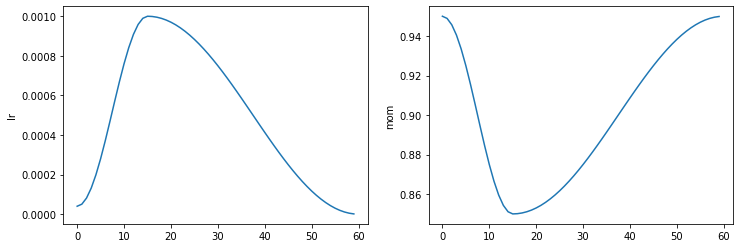

In [72]:
learn.recorder.plot_sched()

In [73]:
learn.fit_one_cycle(1,1e-3,div=2,div_final=10, pct_start=0.8)

epoch,train_loss,valid_loss,accuracy,time
0,1.419440,1.425330,0.607495,00:14


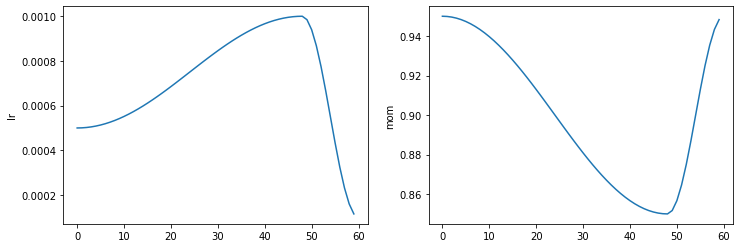

In [74]:
learn.recorder.plot_sched()

In [76]:
learn = fv.Learner(data,model_bn,opt_func=fv.ranger,metrics=fv.accuracy) #aquí usé Ranger

In [77]:
learn.fit_one_cycle(1,1e-3,div=0.9,div_final=10000,pct_start=0.8) #te recomiendan estos valores 

epoch,train_loss,valid_loss,accuracy,time
0,1.418962,1.465668,0.593688,00:15


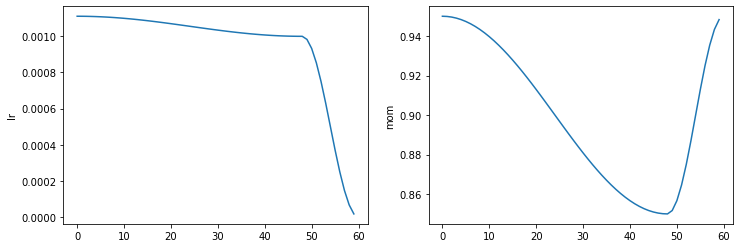

In [79]:
learn.recorder.plot_sched()

## Grupos de parámetros

In [80]:
model_bn

Sequential(
  (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): MaxPool2d(kernel_size=2, strid

In [81]:
def my_own_splitter(m):
    return [list(group.parameters()) for group in [m[0:2], m[2:10], m[10:19], m[19:]]] #la última parte genuinamente tiene que estar en su propio grupo, todo lo demás es medio a tu gusto

In [82]:
learn = fv.Learner(data,model_bn,
                   opt_func=fv.ranger,metrics=fv.accuracy,
                   splitter=my_own_splitter
                  )

In [83]:
learn.freeze_to(-1) #congelo todo menos el último grupo

In [84]:
learn.summary() #las batch norm no las congela nunca

Sequential (Input shape: ['128 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
BatchNorm2d          128 x 3 x 224 x 224  6          True      
________________________________________________________________
Conv2d               128 x 32 x 112 x 11  896        False     
________________________________________________________________
ReLU                 128 x 32 x 112 x 11  0          False     
________________________________________________________________
MaxPool2d            128 x 32 x 56 x 56   0          False     
________________________________________________________________
Conv2d               128 x 64 x 28 x 28   18,496     False     
________________________________________________________________
BatchNorm2d          128 x 64 x 28 x 28   128        True      
________________________________________________________________
ReLU                 128 x 64 x 28 x 28   0          False     
________________________________________________

In [85]:
learn.fit_one_cycle(1,slice(1e-6,1e-3)) #y aquí usa como partimos arriba

epoch,train_loss,valid_loss,accuracy,time
0,1.351990,1.390127,0.609467,00:14


In [86]:
#model_bn[-1] = nn.Linear(256,35) #si ahora voy a entrenar con lo de animales y animales solamente tiene 35 categorías

In [87]:
#Y ahora voy a entrenar otra vez el modelo porque ya está con números aleatorios